# Upcoming Features
> This page is updated in real time

This is a feature testing notebook which contains code before it is tested and added to the library's other notebooks. This is a real-time look at what's under development - this page changes with every commit to the github repo.

In [1]:
# new measures

# the measures module currently contains 10 or so unique measures
# my WIP paper identifies around 40 measures used in published studies, time to get coding...

# measures from paper
['Total Amount Wagered', 'Net Loss', 'Duration', 'Mean Bets Per Day', 'Frequency', 'Number Of Bets', 'Mean Bet Size', 'Percent Loss', 'Frequency Percent', 'Standard Deviation Of Bet Sizes', 'Daily Total Amount Wagered Trajectory', 'Theoretical Loss', 'Total Number Of Sessions', 'Total Playing Time', 'Total Amount Paid', 'Mean Sessions Per Day In Duration', 'Mean Playing Time Per Day', 'Total Amount Won', 'Mean Rake Paid Per Hour', 'Mean Simultaneous Tables', 'Mean Session Length', 'Max 24H Deposit', 'Max 30D Deposit', 'Median Odds Per Bet', 'Median Stake Per Bet', 'Mean Amount Wagered Per Session', 'Median Bets Per Day', 'Median Loss Per Bet', 'Mean Playing Volume Per Day', 'Max Bet Value', 'Min Bet Value', 'Mean Sessions Per Day', 'Mean Rake Paid Per Day', 'Standard Deviation Of Bets Per Day', 'Weekly Number Of Bets Trajectory', 'Weekly Active Days Trajectory', 'Mean Game Types Per Day', 'Sawtooth Occurances', 'Number Of Gambling Activities Played', 'Weekend Total Amount Wagered Ratio', 'Weekend Number Of Bets Ratio', 'Positive Total Amount Won', 'Positive Monies Wagered', 'Number Of Gambling Services Used', 'Mean Total Gambling Hours Per Month', 'Mean Wager-Session Length', 'Mean Loss Per Month', 'Number Of Different Games Played', 'Total Number Of Games Played']


from inspect import getmembers, isfunction
import gamba as gb

# make porting over a little easier
check_measures_data = gb.measures.check_measure_data

player_bets = gb.data.example_bets()

functions = getmembers(gb.measures, isfunction)

display(player_bets.head())

,player_id,bet_size,bet_time,payout_size,payout_time,decimal_odds,house_edge,game_type,provider
0,1,2,2020-12-15 15:03:00,0.00,2020-12-15 15:03:49,2,2,coin flip,coin provider
1,1,2,2020-12-15 15:07:10,0.00,2020-12-15 15:07:28,2,2,coin flip,coin provider
2,1,3,2020-12-15 15:08:31,5.88,2020-12-15 15:08:48,2,2,coin flip,coin provider
3,1,5,2020-12-15 15:11:04,9.80,2020-12-15 15:11:25,2,2,coin flip,coin provider
4,1,5,2020-12-15 15:14:27,9.80,2020-12-15 15:15:25,2,2,coin flip,coin provider


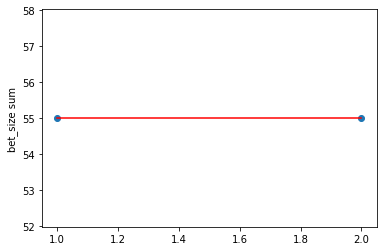

0.0

In [2]:
import math, datetime, numpy as np
from sklearn.linear_model import LinearRegression
def aggregate_bets(player_bets, aggregation='daily'):
    
    aggregations = [] # a collection of dataframes each corresponding to a level of aggregation
    
    if aggregation == 'none':
        return [player_bets]
    
    if aggregation == 'daily':
        player_bets['bet_date'] = player_bets['bet_time'].dt.date
        playing_dates = set(player_bets['bet_date'].values)
        
        for day in playing_dates:
            bets_on_day = player_bets[player_bets['bet_time'].dt.date == day]
            aggregations.append(bets_on_day)
        
        return aggregations
    
    if aggregation == 'weekly':
        player_bets['bet_date'] = player_bets['bet_time'].dt.date
        current_day = player_bets['bet_date'].min()
        last_day = player_bets['bet_date'].max()
        
        num_weeks = math.ceil((last_day - current_day).days / 7)
        
        for week in range(num_weeks):
            end_of_week = current_day + datetime.timedelta(days=7)
            
            print('getting bets between', current_day, 'and', end_of_week)
            bets_this_week = player_bets[(player_bets['bet_date'] >= current_day) & (player_bets['bet_date'] < end_of_week)]
            current_day = end_of_week
            
            aggregations.append(bets_this_week)
            
            return aggregations

import matplotlib.pyplot as plt
def aggregate_trajectory(player_bets, aggregation='daily', plot=False, variable='bet_size'):
    
    "Gradient of a linear regression fitted to the sequence of an aggregated behavioural measure. Aggregation level can be daily, weekly, or monthly."
    
    check_measures_data(player_bets, [variable])
    
    bets = aggregate_bets(player_bets, aggregation=aggregation)
    aggregates = [df[variable].sum() for df in bets]
    
    x = np.array(range(len(aggregates))).reshape((-1, 1)) + 1
    y = aggregates

    model = LinearRegression().fit(x, y)

    model_x = x
    model_y = model.coef_ * x + model.intercept_

    if plot:
        plt.figure()
        plt.scatter(x, y)
        plt.plot(model_x, model_y, color="r")
        plt.ylabel(variable + ' sum')
        plt.show()

    return model.coef_[0]

def total_wagered_trajectory(player_bets, aggregation='daily', plot=False):
    
    return aggregate_trajectory(player_bets, aggregation=aggregation, plot=plot, variable='bet_size')

total_wagered_trajectory(player_bets, aggregation = 'daily', plot=True)

In [3]:

def theoretical_loss(player_bets):
    pass

def num_sessions(player_bets):
    pass

def total_play_time(player_bets):
    pass

def total_paid(player_bets): # game-agnostic, cross-data implementation may be tricky
    pass

def mean_sessions_per_day(player_bets):
    pass

def mean_play_time_per_day(player_bets):
    pass

def total_amount_won(player_bets):
    pass

def mean_rake_per_hour(player_bets): # mercantile game specific
    pass

def mean_simultaneous_tables(player_bets): # poker specific
    pass

def mean_session_length(player_bets):
    pass

def median_odds(player_bets):
    pass

def median_bet_size(player_bets):
    pass

def mean_wagered_per_session(player_bets):
    pass

def median_bets_per_day(player_bets):
    pass

def median_loss_per_bet(player_bets):
    pass

def mean_volume_per_day(player_bets):
    pass

def max_bet_value(player_bets):
    pass

def min_bet_value(player_bets):
    pass

def mean_sessions_per_day(player_bets):
    pass

def mean_rake_per_day(player_bets):
    pass

def std_bets_per_day(player_bets):
    pass

def num_bets_trajectory(player_bets):
    pass

def active_days_trajectory(player_bets):
    pass

def mean_game_types_per_day(player_bets):
    pass

def sawtooth_occurances(player_bets): # tricky business
    pass

def num_activities_played(player_bets):
    pass

def total_wagered_weekend_ratio(player_bets):
    pass

def num_bets_weekend_ratio(player_bets):
    pass

def positive_total_amount_won(player_bets): # conditional duplicate of 'total_amount_won'
    pass

def positive_amount_wagered(player_bets): # potentially function-identical variant
    pass

def num_gambling_services_used(player_bets): # regarding operators, not game types
    pass

def mean_gambling_hours_per_month(player_bets):
    pass

def mean_wager_session_length(player_bets): # dragicevic variant, not identical to 'mean_session_length'
    pass

def mean_loss_per_month(player_bets):
    pass

def num_unique_games_played(player_bets):
    pass

def num_games_played(player_bets): # duplicate of 'num_activities_played'
    pass

In [5]:
# new capabilities

gb.measures.create_measures_table(player_bets, ['duration','frequency'])

[[1], [3], [66.66666666666666]]


,player_id,duration,frequency
0,1,3,66.666667


In [ ]:
# new techniques

# the neural networks used in the Philander 2014 replication need better documentation and parameterisation